# **1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib.pylab import plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score , classification_report
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\youne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\youne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\youne\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **2. Reading Data**

In [ ]:
news_data = pd.read_csv('C:\\Users\\youne\\Desktop\\Master\\S2\\NLP\\Projet\\WELFake_Dataset.csv')

In [ ]:
news_data.sample(5,random_state=0)

Unnamed: 0                                              title  \
17232       17232  DERANGED LEFTISTS Cross The Line: Chicago Play...   
18712       18712     Cambodian PM leaves for China to seek more aid   
22555       22555  REPORTER INTERVIEWING TRUMP Refers To CA Terro...   
2361         2361  Donald Trump’s despotic fantasies: Here’s what...   
57875       57875  Kasich: Extreme Republicans, Democrats ’Ought ...   

                                                    text  label  
17232  A play scheduled to open Saturday night in Chi...      1  
18712  PHNOM PENH (Reuters) - Cambodian Prime Ministe...      0  
22555   Well, I don t know. When you have pipe bombs ...      1  
2361   He had also vividly shown his colors at that p...      0  
57875  Sunday on CNN’s “State of the Union,” while di...      0

In [ ]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
news_data.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
news_data.drop(["Unnamed: 0"], axis=1, inplace=True)

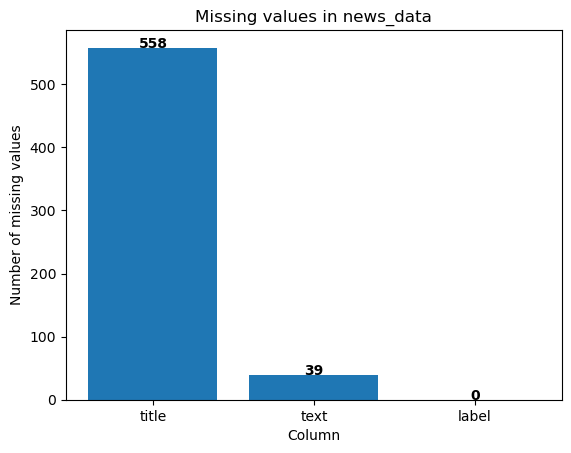

In [ ]:
# Calculate missing values
missing_values = news_data.isnull().sum()

# Create bar chart
plt.bar(x=missing_values.index, height=missing_values.values)

# Add labels and title
plt.xlabel('Column')
plt.ylabel('Number of missing values')
plt.title('Missing values in news_data')

# Add text labels to each bar
for i, v in enumerate(missing_values.values):
    plt.text(i, v, str(v), ha='center', fontweight='bold')

# Show plot
plt.show()

In [ ]:
news_data = news_data.fillna('')

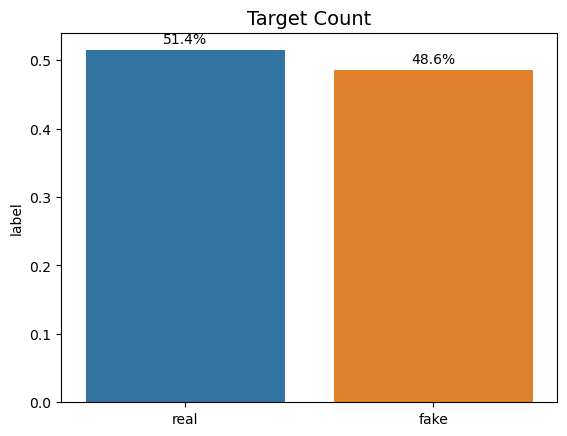

In [ ]:
# Count the number of occurrences of each label and normalize the result
label_counts = news_data.label.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

# Create bar plot
ax = sns.barplot(x=label_counts.index, y=label_counts)

# Add title
plt.title('Target Count', fontsize=14)

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:.1%}'.format(height), ha="center")

# Show plot
plt.show()

### Data Visualization of all News Titles : 

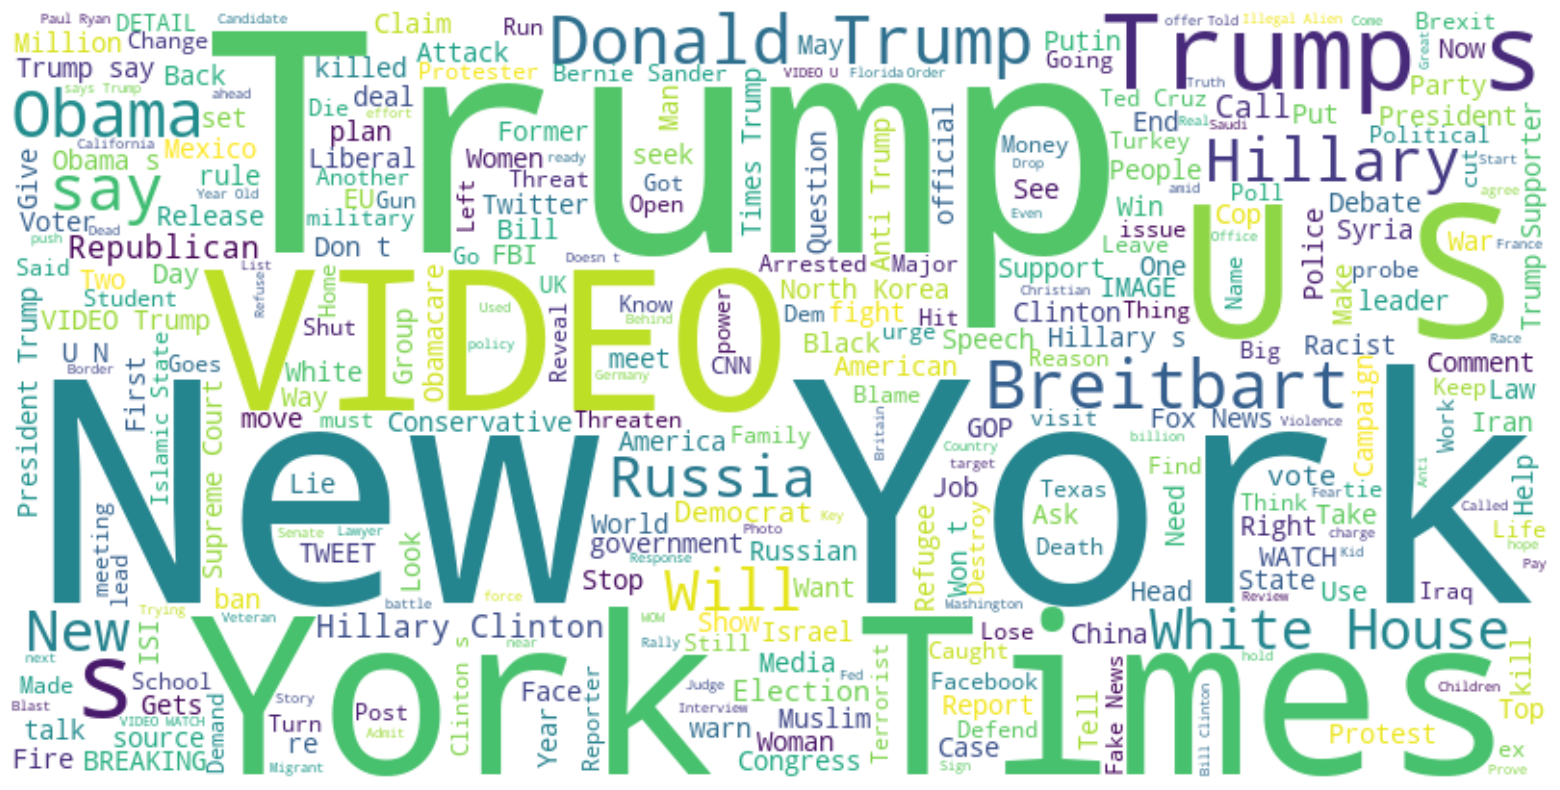

In [ ]:
titles = ' '.join(title for title in news_data['title'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Data Visualization of texts in fake news :

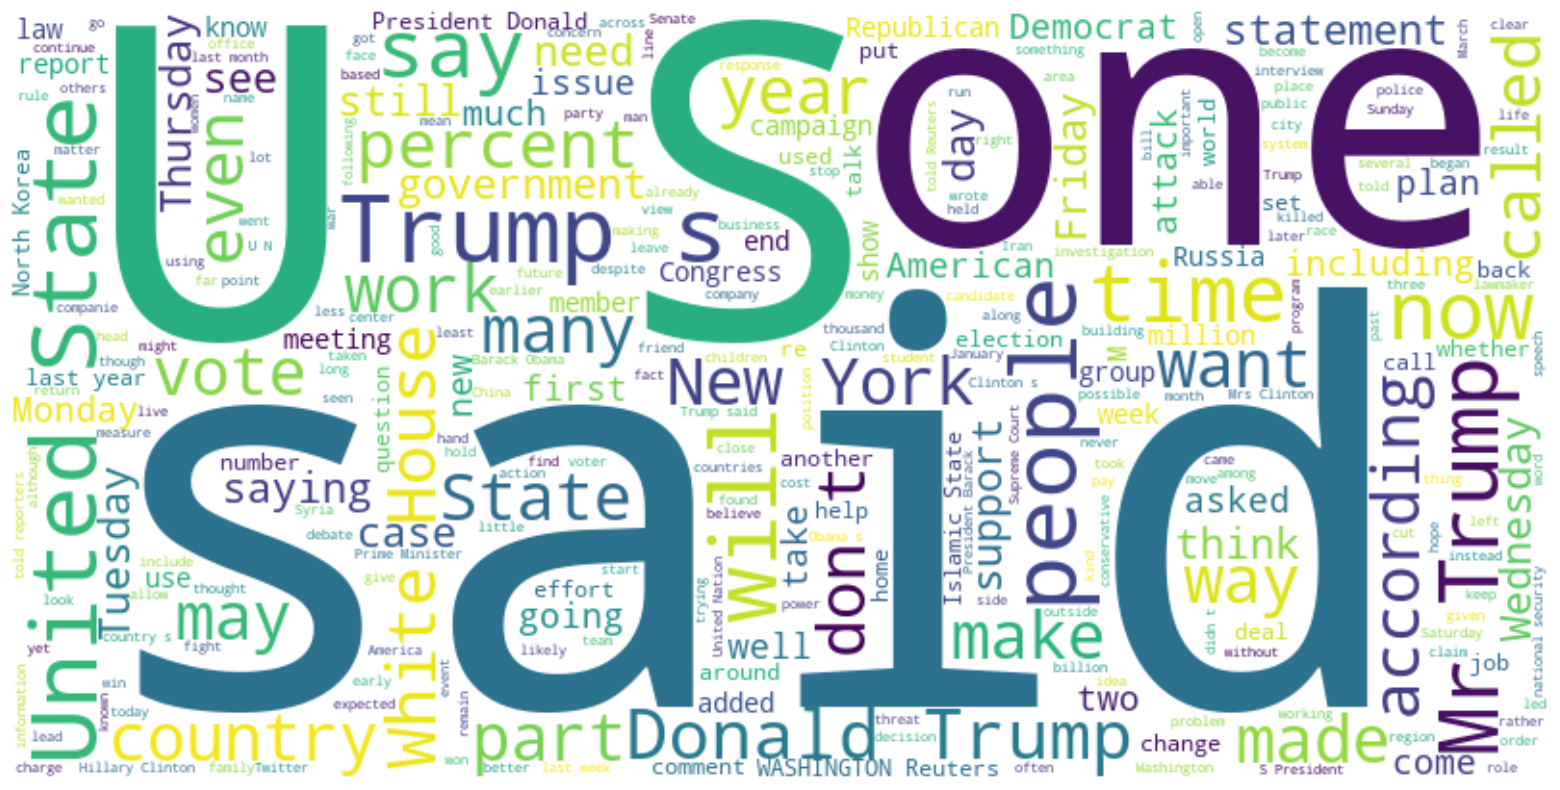

In [ ]:
fake_texts = ' '.join(text for text in news_data[news_data['label'] == 0]['text'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Data Visualization of texts in Real news :

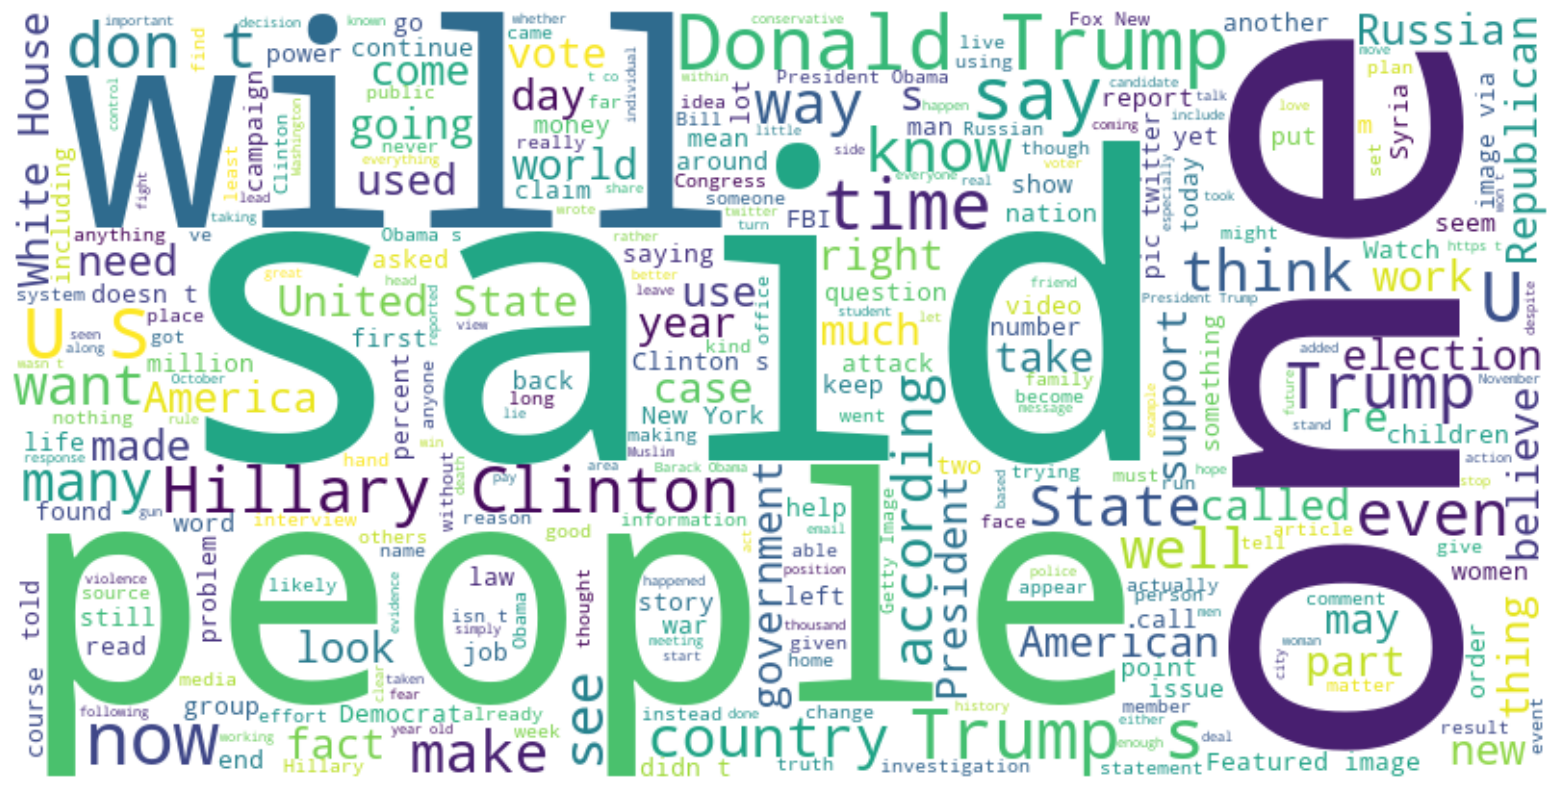

In [ ]:
fake_texts = ' '.join(text for text in news_data[news_data['label'] == 1]['text'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
news_data['News'] = news_data['title'] + ' ' + news_data['text']

X = news_data['News']
y = news_data['label']

In [ ]:
news_data.drop(['title','text'], axis=1, inplace=True)

In [ ]:
news_data.sample(5,random_state=0)

label                                               News
17232      1  DERANGED LEFTISTS Cross The Line: Chicago Play...
18712      0  Cambodian PM leaves for China to seek more aid...
22555      1  REPORTER INTERVIEWING TRUMP Refers To CA Terro...
2361       0  Donald Trump’s despotic fantasies: Here’s what...
57875      0  Kasich: Extreme Republicans, Democrats ’Ought ...

# **3. Data Preprocessing**

In [ ]:
news_data["News"] = news_data["News"].str.lower()
news_data.sample(5,random_state=0)

label                                               News
17232      1  deranged leftists cross the line: chicago play...
18712      0  cambodian pm leaves for china to seek more aid...
22555      1  reporter interviewing trump refers to ca terro...
2361       0  donald trump’s despotic fantasies: here’s what...
57875      0  kasich: extreme republicans, democrats ’ought ...

# **3.1 Remove Punctuation**

In [5]:
def remove_punctuation(news):
    punctuationfree = "".join(
        [i for i in news if i not in string.punctuation])
    return punctuationfree

In [ ]:
news_data['removed_punc_News'] = news_data['News'].apply(lambda x: remove_punctuation(x))
news_data.sample(5,random_state=0)

label                                               News  \
17232      1  deranged leftists cross the line: chicago play...   
18712      0  cambodian pm leaves for china to seek more aid...   
22555      1  reporter interviewing trump refers to ca terro...   
2361       0  donald trump’s despotic fantasies: here’s what...   
57875      0  kasich: extreme republicans, democrats ’ought ...   

                                       removed_punc_News  
17232  deranged leftists cross the line chicago play ...  
18712  cambodian pm leaves for china to seek more aid...  
22555  reporter interviewing trump refers to ca terro...  
2361   donald trump’s despotic fantasies here’s what ...  
57875  kasich extreme republicans democrats ’ought to...

# **3.2 Remove Numbers**

In [6]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [ ]:
# apply the remove_numbers function to the 'Clean_Text' column
news_data['removed_punc_News'] = news_data['removed_punc_News'].apply(
    remove_numbers)
news_data.sample(5,random_state=0)

# **3.3 Tokenization**

In [7]:
def tokenization(news):
    #tokenize the text using RegexpTokenizer
    # r'\w+' means that we want to tokenize the text by words (r'\w+')
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(news)
    return tokens

In [ ]:
news_data['tokens_News'] = news_data['removed_punc_News'].apply(lambda x: tokenization(x))
news_data.head()

label                                               News  \
0      1  law enforcement on high alert following threat...   
1      1     did they post their votes for hillary already?   
2      1  unbelievable! obama’s attorney general says mo...   
3      0  bobby jindal, raised hindu, uses story of chri...   
4      1  satan 2: russia unvelis an image of its terrif...   

                                   removed_punc_News  \
0  law enforcement on high alert following threat...   
1      did they post their votes for hillary already   
2  unbelievable obama’s attorney general says mos...   
3  bobby jindal raised hindu uses story of christ...   
4  satan  russia unvelis an image of its terrifyi...   

                                         tokens_News  
0  [law, enforcement, on, high, alert, following,...  
1  [did, they, post, their, votes, for, hillary, ...  
2  [unbelievable, obama, s, attorney, general, sa...  
3  [bobby, jindal, raised, hindu, uses, story, of...  
4  [satan, russia, unvelis, an, image, of, its, t...

# **3.4 Remove StopWords**

In [8]:
def remove_stopwords(news):
    stopword = stopwords.words('english')
    news_stopwords = [i for i in news if i not in stopword]
    return news_stopwords

In [ ]:
news_data['no_stop_words'] = news_data['tokens_News'].apply(lambda x: remove_stopwords(x))
news_data.sample(5,random_state=0)

label                                               News  \
17232      1  deranged leftists cross the line: chicago play...   
18712      0  cambodian pm leaves for china to seek more aid...   
22555      1  reporter interviewing trump refers to ca terro...   
2361       0  donald trump’s despotic fantasies: here’s what...   
57875      0  kasich: extreme republicans, democrats ’ought ...   

                                       removed_punc_News  \
17232  deranged leftists cross the line chicago play ...   
18712  cambodian pm leaves for china to seek more aid...   
22555  reporter interviewing trump refers to ca terro...   
2361   donald trump’s despotic fantasies here’s what ...   
57875  kasich extreme republicans democrats ’ought to...   

                                             tokens_News  \
17232  [deranged, leftists, cross, the, line, chicago...   
18712  [cambodian, pm, leaves, for, china, to, seek, ...   
22555  [reporter, interviewing, trump, refers, to, ca...   
2361   [donald, trump, s, despotic, fantasies, here, ...   
57875  [kasich, extreme, republicans, democrats, ough...   

                                           no_stop_words  
17232  [deranged, leftists, cross, line, chicago, pla...  
18712  [cambodian, pm, leaves, china, seek, aid, phno...  
22555  [reporter, interviewing, trump, refers, ca, te...  
2361   [donald, trump, despotic, fantasies, world, wo...  
57875  [kasich, extreme, republicans, democrats, ough...

# **3.5 Lemmitization**

In [11]:
# lemmitization using WordNetLemmatizer
def lemmatization(news):
    lemmatizer = WordNetLemmatizer()
    news_lemmatization = [lemmatizer.lemmatize(i) for i in news]
    return news_lemmatization

In [ ]:
news_data['News_Lemmitization'] = news_data['no_stop_words'].apply(lambda x: lemmatization(x))
news_data.sample(5,random_state=0)

label                                               News  \
17232      1  deranged leftists cross the line: chicago play...   
18712      0  cambodian pm leaves for china to seek more aid...   
22555      1  reporter interviewing trump refers to ca terro...   
2361       0  donald trump’s despotic fantasies: here’s what...   
57875      0  kasich: extreme republicans, democrats ’ought ...   

                                       removed_punc_News  \
17232  deranged leftists cross the line chicago play ...   
18712  cambodian pm leaves for china to seek more aid...   
22555  reporter interviewing trump refers to ca terro...   
2361   donald trump’s despotic fantasies here’s what ...   
57875  kasich extreme republicans democrats ’ought to...   

                                             tokens_News  \
17232  [deranged, leftists, cross, the, line, chicago...   
18712  [cambodian, pm, leaves, for, china, to, seek, ...   
22555  [reporter, interviewing, trump, refers, to, ca...   
2361   [donald, trump, s, despotic, fantasies, here, ...   
57875  [kasich, extreme, republicans, democrats, ough...   

                                           no_stop_words  \
17232  [deranged, leftists, cross, line, chicago, pla...   
18712  [cambodian, pm, leaves, china, seek, aid, phno...   
22555  [reporter, interviewing, trump, refers, ca, te...   
2361   [donald, trump, despotic, fantasies, world, wo...   
57875  [kasich, extreme, republicans, democrats, ough...   

                                      News_Lemmitization  
17232  [deranged, leftist, cross, line, chicago, play...  
18712  [cambodian, pm, leaf, china, seek, aid, phnom,...  
22555  [reporter, interviewing, trump, refers, ca, te...  
2361   [donald, trump, despotic, fantasy, world, woul...  
57875  [kasich, extreme, republican, democrat, ought,...

In [ ]:
# from lemmatization to clean text
clean_text = []
for i in range(len(news_data)):
    clean_text.append(' '.join(news_data['News_Lemmitization'][i]))
news_data['Clean_Text'] = clean_text
news_data.sample(5, random_state=0)

label                                               News  \
17232      1  deranged leftists cross the line: chicago play...   
18712      0  cambodian pm leaves for china to seek more aid...   
22555      1  reporter interviewing trump refers to ca terro...   
2361       0  donald trump’s despotic fantasies: here’s what...   
57875      0  kasich: extreme republicans, democrats ’ought ...   

                                       removed_punc_News  \
17232  deranged leftists cross the line chicago play ...   
18712  cambodian pm leaves for china to seek more aid...   
22555  reporter interviewing trump refers to ca terro...   
2361   donald trump’s despotic fantasies here’s what ...   
57875  kasich extreme republicans democrats ’ought to...   

                                             tokens_News  \
17232  [deranged, leftists, cross, the, line, chicago...   
18712  [cambodian, pm, leaves, for, china, to, seek, ...   
22555  [reporter, interviewing, trump, refers, to, ca...   
2361   [donald, trump, s, despotic, fantasies, here, ...   
57875  [kasich, extreme, republicans, democrats, ough...   

                                           no_stop_words  \
17232  [deranged, leftists, cross, line, chicago, pla...   
18712  [cambodian, pm, leaves, china, seek, aid, phno...   
22555  [reporter, interviewing, trump, refers, ca, te...   
2361   [donald, trump, despotic, fantasies, world, wo...   
57875  [kasich, extreme, republicans, democrats, ough...   

                                      News_Lemmitization  \
17232  [deranged, leftist, cross, line, chicago, play...   
18712  [cambodian, pm, leaf, china, seek, aid, phnom,...   
22555  [reporter, interviewing, trump, refers, ca, te...   
2361   [donald, trump, despotic, fantasy, world, woul...   
57875  [kasich, extreme, republican, democrat, ought,...   

                                              Clean_Text  
17232  deranged leftist cross line chicago play targe...  
18712  cambodian pm leaf china seek aid phnom penh re...  
22555  reporter interviewing trump refers ca terroris...  
2361   donald trump despotic fantasy world would look...  
57875  kasich extreme republican democrat ought margi...

# **4. Text Representation :**

# **4.1 Bag-of-Words :**

In [ ]:
# Bag of Words representation
bow_vectorizer = CountVectorizer()

In [ ]:
bow_representation = bow_vectorizer.fit_transform(news_data['Clean_Text']).toarray()

In [ ]:
bow_text = bow_vectorizer.transform(clean_text)

In [ ]:
# print the vocabulary (i.e., the unique words in the Bag of Words representation)
print(bow_vectorizer.get_feature_names())

['aaron', 'abadi', 'abandon', 'abandoned', 'abandoning', 'abbas', 'abbott', 'abc', 'abdel', 'abdul', 'abdullah', 'abe', 'abedin', 'abide', 'ability', 'able', 'aboard', 'abolish', 'aborted', 'abortion', 'abraham', 'abrams', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absentee', 'absolute', 'absolutely', 'absorb', 'absurd', 'abu', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'aca', 'academia', 'academic', 'academy', 'accelerate', 'accelerated', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accessory', 'accident', 'accidental', 'accidentally', 'accommodate', 'accommodation', 'accompanied', 'accompanying', 'accomplice', 'accomplish', 'accomplished', 'accomplishment', 'accord', 'accordance', 'according', 'accordingly', 'account', 'accountability', 'accountable', 'accountant', 'accounted', 'accounting', 'accuracy', 'accurate', 'accurately', 'accusation', 'accuse', 'accused', 'accuser', 'accuses', 'accusing', 'accu

C:\Users\youne\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# print the Bag of Words representation
print(bow_representation)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **4.2 TF-IDF :**

In [ ]:
# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
tfidf_representation = tfidf_vectorizer.fit_transform(news_data['Clean_Text']).toarray()

In [ ]:
tfidf_text = tfidf_vectorizer.transform(clean_text)

In [ ]:
#print the vocabulary (i.e., the unique words in the TF-IDF representation)
print(tfidf_vectorizer.get_feature_names())

['aaron', 'abadi', 'abandon', 'abandoned', 'abandoning', 'abbas', 'abbott', 'abc', 'abdel', 'abdul', 'abdullah', 'abe', 'abedin', 'abide', 'ability', 'able', 'aboard', 'abolish', 'aborted', 'abortion', 'abraham', 'abrams', 'abroad', 'abrupt', 'abruptly', 'absence', 'absent', 'absentee', 'absolute', 'absolutely', 'absorb', 'absurd', 'abu', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'aca', 'academia', 'academic', 'academy', 'accelerate', 'accelerated', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accessory', 'accident', 'accidental', 'accidentally', 'accommodate', 'accommodation', 'accompanied', 'accompanying', 'accomplice', 'accomplish', 'accomplished', 'accomplishment', 'accord', 'accordance', 'according', 'accordingly', 'account', 'accountability', 'accountable', 'accountant', 'accounted', 'accounting', 'accuracy', 'accurate', 'accurately', 'accusation', 'accuse', 'accused', 'accuser', 'accuses', 'accusing', 'accu

In [ ]:
# print the TF-IDF representation
print(tfidf_representation)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 5. Develop The Models

### Split Data For Bag-of-Words :

In [ ]:
X_BagofWords = bow_text
y_BagofWords = news_data['label']

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    X_BagofWords, y_BagofWords, test_size=0.2, random_state=42)

###  Split Data For TF-IDF :

In [ ]:
X_tfidf = tfidf_text
y_tfidf = news_data['label']

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y_tfidf, test_size=0.2, random_state=42)

# 5.1  Model 1: Naive Bayes

## Naive Bayes Model Using Bag-Of-Words : 

In [ ]:
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train_bow)

MultinomialNB()

In [ ]:
y_pred_bow = nb_bow.predict(X_test_bow)

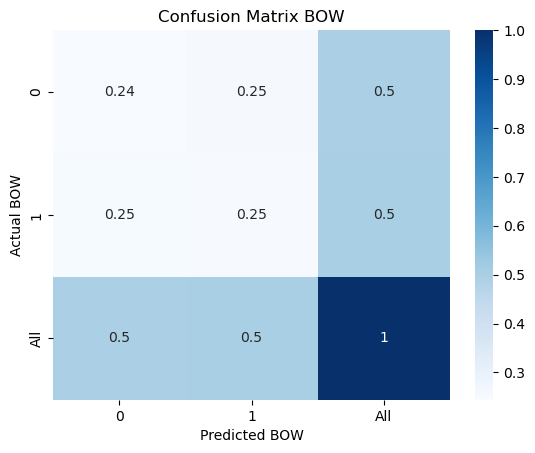

In [ ]:
conf_matrix_bow = pd.crosstab(pd.Series(y_test_bow, name='Actual_Bow'), pd.Series(y_pred_bow, name='Predicted_Bow'), 
                          rownames=['Actual_Bow'], colnames=['Predicted_Bow'], 
                          margins=True, normalize=True)
conf_matrix_bow = conf_matrix_bow.apply(pd.to_numeric)
sns.heatmap(conf_matrix_bow, annot=True, cmap='Blues')
plt.title('Confusion Matrix BOW')
plt.xlabel('Predicted BOW')
plt.ylabel('Actual BOW')
plt.show()

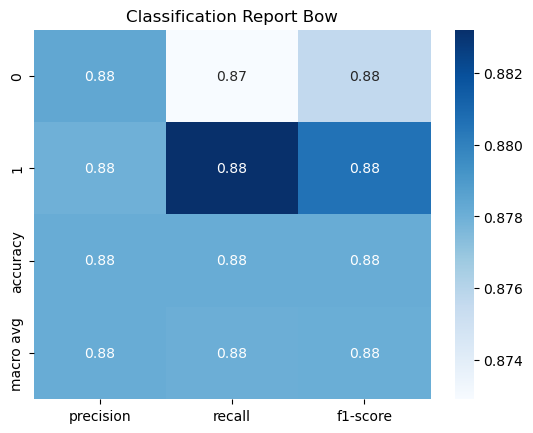

In [ ]:
class_report_bow = pd.DataFrame(classification_report(y_test_bow, y_pred_bow, output_dict=True)).transpose()
sns.heatmap(class_report_bow.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Bow')
plt.show()

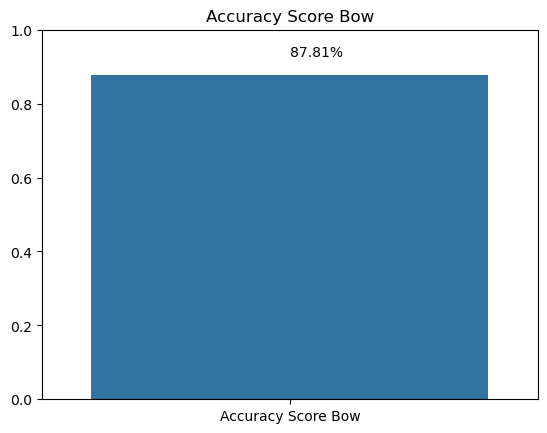

In [ ]:
acc_score_bow = accuracy_score(y_test_bow, y_pred_bow)
sns.barplot(x=['Accuracy Score Bow'], y=[acc_score_bow])
plt.ylim([0, 1])
plt.title('Accuracy Score Bow')
plt.text(x=0, y=acc_score_bow+0.05, s="{:.2%}".format(acc_score_bow))
plt.show()

## Naive Bayes Model Using TF-IDF : 

In [ ]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

MultinomialNB()

In [ ]:
y_pred_tfidf= nb_tfidf.predict(X_test_tfidf)

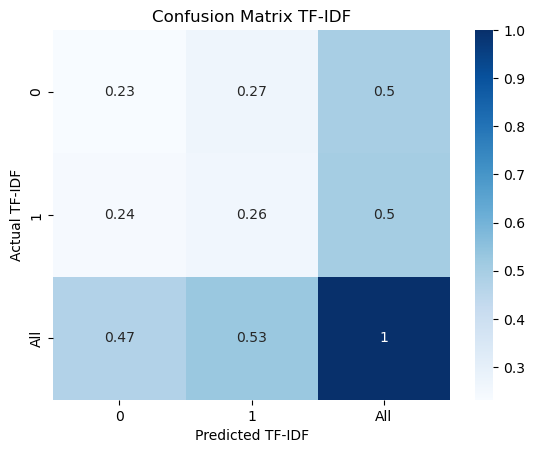

In [ ]:
conf_matrix_tfidf = pd.crosstab(pd.Series(y_test_tfidf, name='Actualy_tfidf'), pd.Series(y_pred_tfidf, name='Predicted_tfidf'), 
                          rownames=['Actual_tfidf'], colnames=['Predicted_tfidf'], 
                          margins=True, normalize=True)
conf_matrix_tfidf = conf_matrix_tfidf.apply(pd.to_numeric)

sns.heatmap(conf_matrix_tfidf, annot=True, cmap='Blues')
plt.title('Confusion Matrix TF-IDF')
plt.xlabel('Predicted TF-IDF')
plt.ylabel('Actual TF-IDF')
plt.show()

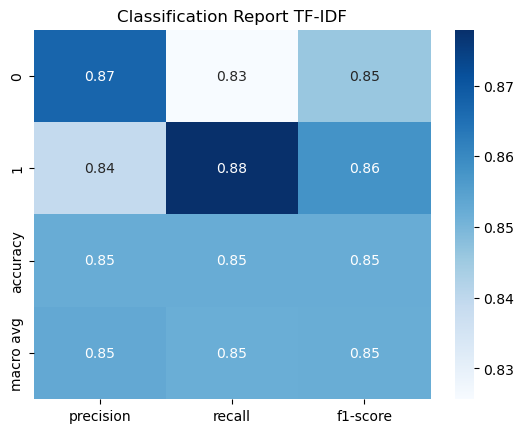

In [ ]:
class_report_tfidf = pd.DataFrame(classification_report(y_test_tfidf, y_pred_tfidf, output_dict=True)).transpose()
sns.heatmap(class_report_tfidf.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report TF-IDF')
plt.show()

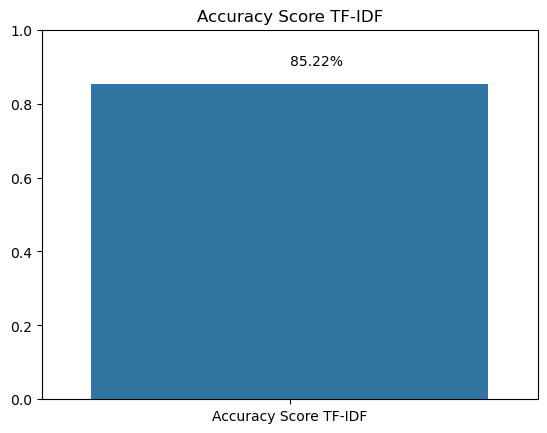

In [ ]:
acc_score_tfidf= accuracy_score(y_test_tfidf, y_pred_tfidf)
sns.barplot(x=['Accuracy Score TF-IDF'], y=[acc_score_tfidf])
plt.ylim([0, 1])
plt.title('Accuracy Score TF-IDF')
plt.text(x=0, y=acc_score_tfidf+0.05, s="{:.2%}".format(acc_score_tfidf))
plt.show()

# 5.2  Model 2: Logistic Regression

## Logistic Regression Model Using Bag-Of-Words : 

In [ ]:
lr_bow = LogisticRegression(max_iter=1000)
lr_bow.fit(X_train_bow, y_train_bow)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_lr_bow = lr_bow.predict(X_test_bow)

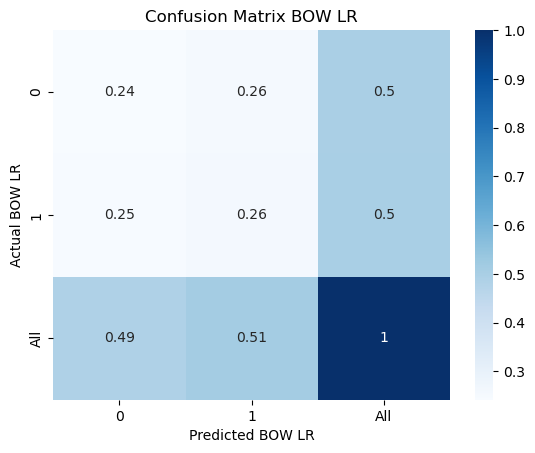

In [ ]:
conf_matrix_lr_bow = pd.crosstab(pd.Series(y_test_bow, name='Actual_Bow LR'), pd.Series(y_pred_lr_bow, name='Predicted_Bow LR'), 
                          rownames=['Actual_Bow LR'], colnames=['Predicted_Bow LR'], 
                          margins=True, normalize=True)
conf_matrix_lr_bow = conf_matrix_lr_bow.apply(pd.to_numeric)
sns.heatmap(conf_matrix_lr_bow, annot=True, cmap='Blues')
plt.title('Confusion Matrix BOW LR')
plt.xlabel('Predicted BOW LR')
plt.ylabel('Actual BOW LR')
plt.show()

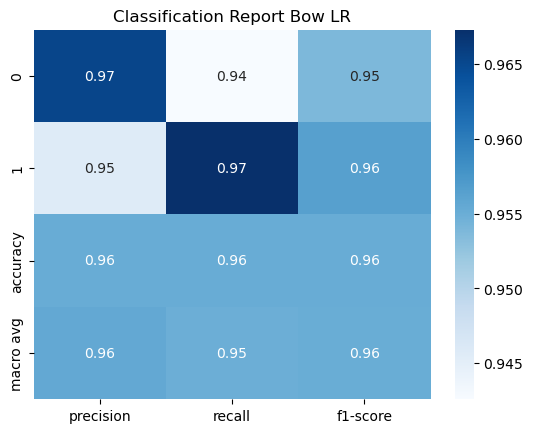

In [ ]:
class_report_bow_LR = pd.DataFrame(classification_report(y_test_bow, y_pred_lr_bow, output_dict=True)).transpose()
sns.heatmap(class_report_bow_LR.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Bow LR')
plt.show()

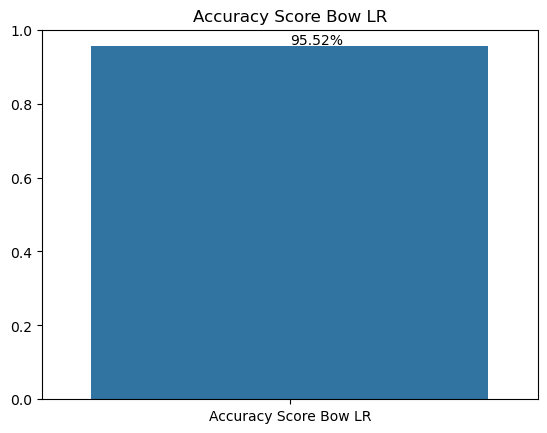

In [ ]:
acc_score_bow_lr = accuracy_score(y_test_bow, y_pred_lr_bow)
sns.barplot(x=['Accuracy Score Bow LR'], y=[acc_score_bow_lr])
plt.ylim([0, 1])
plt.title('Accuracy Score Bow LR')
plt.text(x=0, y=acc_score_bow_lr+0.004, s="{:.2%}".format(acc_score_bow_lr))
plt.show()

## Logistic Regression Model Using TF-IDF : 

In [ ]:
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf_lr= lr_tfidf.predict(X_test_tfidf)

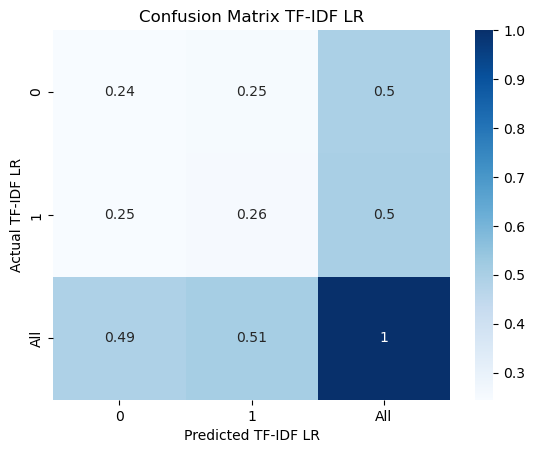

In [ ]:
conf_matrix_tfidf_lr = pd.crosstab(pd.Series(y_test_tfidf, name='Actualy_tfidf LR'), pd.Series(y_pred_tfidf_lr, name='Predicted_tfidf LR'), 
                          rownames=['Actual_tfidf LR'], colnames=['Predicted_tfidf LR'], 
                          margins=True, normalize=True)
conf_matrix_tfidf_lr = conf_matrix_tfidf_lr.apply(pd.to_numeric)

sns.heatmap(conf_matrix_tfidf_lr, annot=True, cmap='Blues')
plt.title('Confusion Matrix TF-IDF LR')
plt.xlabel('Predicted TF-IDF LR')
plt.ylabel('Actual TF-IDF LR')
plt.show()

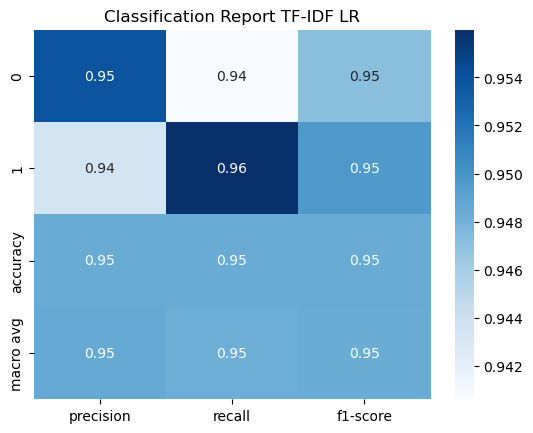

In [ ]:
class_report_tfidf_lr = pd.DataFrame(classification_report(y_test_tfidf, y_pred_tfidf_lr, output_dict=True)).transpose()
sns.heatmap(class_report_tfidf_lr.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report TF-IDF LR')
plt.show()

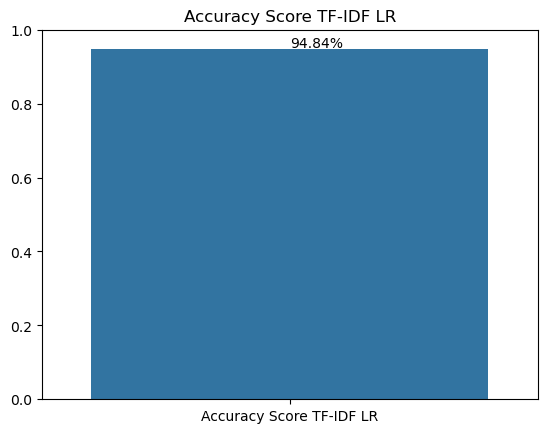

In [ ]:
acc_score_tfidf_lr= accuracy_score(y_test_tfidf, y_pred_tfidf_lr)
sns.barplot(x=['Accuracy Score TF-IDF LR'], y=[acc_score_tfidf_lr])
plt.ylim([0, 1])
plt.title('Accuracy Score TF-IDF LR')
plt.text(x=0, y=acc_score_tfidf_lr+0.005, s="{:.2%}".format(acc_score_tfidf_lr))
plt.show()

# 5.3  Model 3: Random Forest Classifier

## Random Forest Classifier Model Using BoW : 

In [ ]:
rf_bow = RandomForestClassifier()
rf_bow.fit(X_train_bow, y_train_bow)

RandomForestClassifier()

In [ ]:
y_pred_rf_bow = rf_bow.predict(X_test_bow)

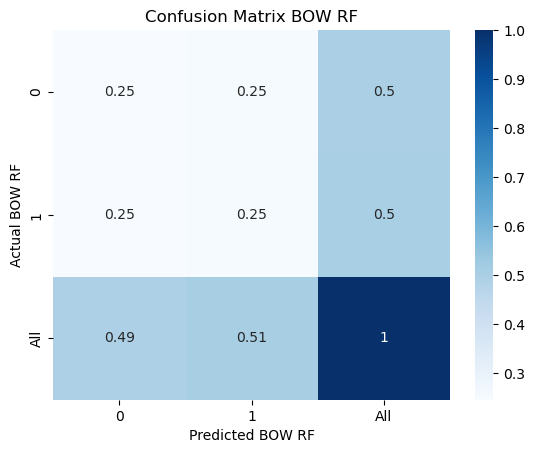

In [ ]:
conf_matrix_rf_bow = pd.crosstab(pd.Series(y_test_bow, name='Actual_Bow RF'), pd.Series(y_pred_rf_bow, name='Predicted_Bow RF'), 
                          rownames=['Actual_Bow RF'], colnames=['Predicted_Bow RF'], 
                          margins=True, normalize=True)
conf_matrix_rf_bow = conf_matrix_rf_bow.apply(pd.to_numeric)
sns.heatmap(conf_matrix_rf_bow, annot=True, cmap='Blues')
plt.title('Confusion Matrix BOW RF')
plt.xlabel('Predicted BOW RF')
plt.ylabel('Actual BOW RF')
plt.show()

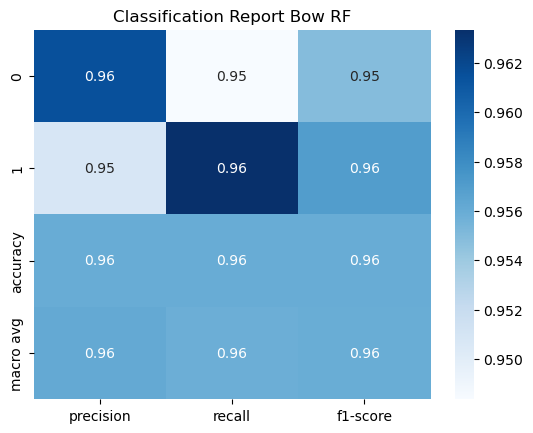

In [ ]:
class_report_bow_Rf = pd.DataFrame(classification_report(y_test_bow, y_pred_rf_bow, output_dict=True)).transpose()
sns.heatmap(class_report_bow_Rf.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report Bow RF')
plt.show()

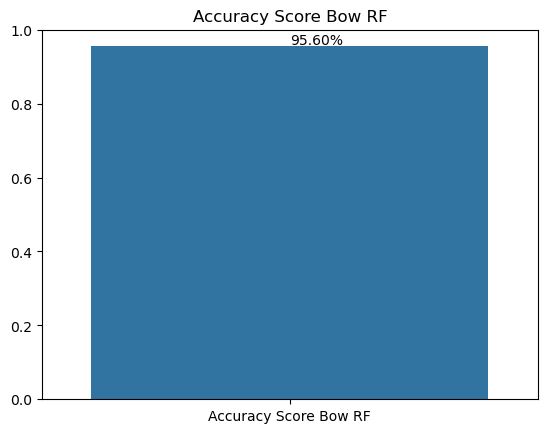

In [ ]:
acc_score_bow_rf = accuracy_score(y_test_bow, y_pred_rf_bow)
sns.barplot(x=['Accuracy Score Bow RF'], y=[acc_score_bow_rf])
plt.ylim([0, 1])
plt.title('Accuracy Score Bow RF')
plt.text(x=0, y=acc_score_bow_rf+0.004, s="{:.2%}".format(acc_score_bow_rf))
plt.show()

## Random Forest Classifier Model Using TF-IDF : 

In [ ]:
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train_tfidf)

RandomForestClassifier()

In [ ]:
y_pred_tfidf_rf= rf_tfidf.predict(X_test_tfidf)

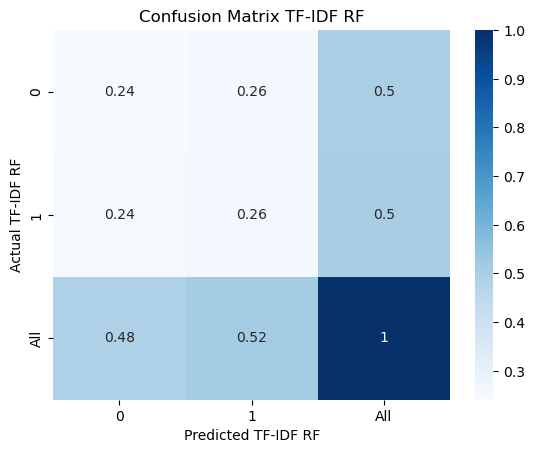

In [ ]:
conf_matrix_tfidf_rF = pd.crosstab(pd.Series(y_test_tfidf, name='Actualy_tfidf RF'), pd.Series(y_pred_tfidf_rf, name='Predicted_tfidf RF'), 
                          rownames=['Actual_tfidf RF'], colnames=['Predicted_tfidf RF'], 
                          margins=True, normalize=True)
conf_matrix_tfidf_rF = conf_matrix_tfidf_rF.apply(pd.to_numeric)

sns.heatmap(conf_matrix_tfidf_rF, annot=True, cmap='Blues')
plt.title('Confusion Matrix TF-IDF RF')
plt.xlabel('Predicted TF-IDF RF')
plt.ylabel('Actual TF-IDF RF')
plt.show()

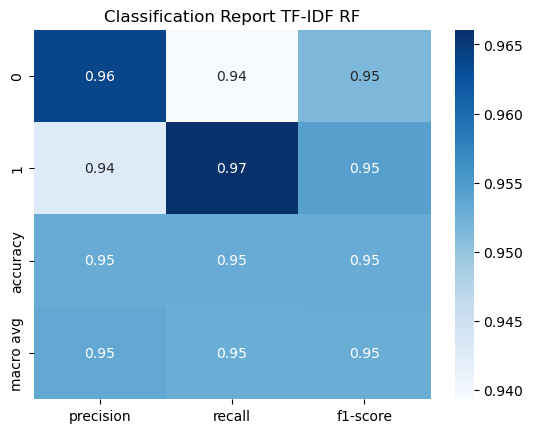

In [ ]:
class_report_tfidf_rF = pd.DataFrame(classification_report(y_test_tfidf, y_pred_tfidf_rf, output_dict=True)).transpose()
sns.heatmap(class_report_tfidf_rF.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report TF-IDF RF')
plt.show()

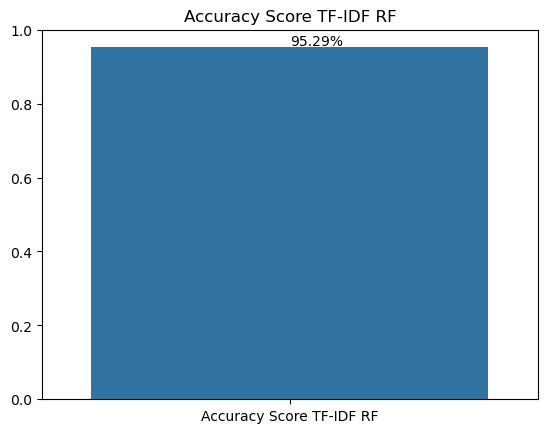

In [ ]:
acc_score_tfidf_rf= accuracy_score(y_test_tfidf, y_pred_tfidf_rf)
sns.barplot(x=['Accuracy Score TF-IDF RF'], y=[acc_score_tfidf_rf])
plt.ylim([0, 1])
plt.title('Accuracy Score TF-IDF RF')
plt.text(x=0, y=acc_score_tfidf_rf+0.005, s="{:.2%}".format(acc_score_tfidf_rf))
plt.show()

#  Test The Best Model

In [ ]:
def predict_fake_news(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatization(text)
    text = ' '.join(text)
    text = bow_vectorizer.transform([text])
    prediction = rf_bow.predict(text)
    if prediction == 1:
         return 'Real News'
    else:
         return 'Fake News'

In [22]:
text_fake = "WASHINGTON (Reuters) - President Donald Trump has stepped up his attacks on Republican senators, an approach he may regret if he is someday impeached and the Senate has to weigh charges against him stemming from an investigation into Russian meddling in the 2016 U.S. election. More than half of the 11 Republicans on the Senate Judiciary Committee, which would be central to any proceeding to remove Trump from office, have tangled with the Republican president, including on Thursday when he fired off early-morning tweets. In one Twitter series, Trump called Senator Lindsey Graham “publicity seeking” and said he “just can’t forget his election trouncing” in the 2016 presidential race. Trump also assailed Senator Jeff Flake, another Republican critic, as “a non-factor in the Senate,” adding, “He’s toxic.” Flake and Graham are members of the Judiciary Committee, whose Chairman Chuck Grassley has urged Trump to tone it down. “He should be 100 percent sticking to ideas and forget about personalities,” Grassley said on Friday when pressed on whether Trump might find himself without the friends in Congress he would need to defend himself in an impeachment proceeding. For his part, Grassley said his views would not be colored by past presidential sniping. “Let’s say the House of Representatives impeached the president of the United States. Then I’m a juror,” Grassley said. “The Senate is the jury that decides whether he should be impeached. The jury is supposed to be impartial.” There is little serious talk being heard in Congress about removing Trump from office. Two House Democrats have introduced an article of impeachment alleging obstruction of justice by the president in connection with an ongoing investigation of possible ties between his 2016 campaign and Moscow. But Republicans control the House, as well as the Senate, and the article of impeachment has gained little traction.  Under the U.S. Constitution, the House of Representatives can vote to approve an impeachment measure. If that happens, it goes to the Senate, which acts as a jury and weighs the charges in the House measure. A two-thirds Senate vote is needed for conviction. Approval leads to removal from office. Two presidents have been impeached by the House: Andrew Johnson in 1868 and Bill Clinton in 1998. Neither was convicted by the Senate. President Richard Nixon, facing almost certain impeachment over the Watergate scandal, resigned in 1974. In the Clinton impeachment fight, the committee was a resource for the full Senate and could play a similar role in any future trial. The White House did not immediately respond to a request for comment. Having friends would help any president facing impeachment, said Charles Brain, a White House liaison to Congress during Clinton’s impeachment. Without such friendships, Brain said, lawmakers “can just be quiet,” refusing to share information with the White House and letting attacks on the president gain momentum. Besides Flake and Graham, Trump has had run-ins over various issues before and after his election with Republican Senator Ted Cruz, and other Judiciary Committee members, including Grassley, John Cornyn, Orrin Hatch, Thom Tillis and Ben Sasse. The president has also at times attacked Republican senators not on the committee, including Mitch McConnell, John McCain, Marco Rubio, Rand Paul and Lisa Murkowski. Special counsel Robert Mueller is investigating whether Trump’s campaign colluded with Russia to influence the election. Grassley’s committee also is looking into the matter, as are other congressional panels. The Kremlin denies any election interference. Trump has dismissed the Mueller probe as a “witch hunt” and denies any collusion. In the end, Mueller could end up clearing Trump and his aides of any wrongdoing.  If not, at least two questions will loom large in a possible impeachment inquiry, said senior fellow Elaine Kamarck of the liberal-leaning Brookings Institution think tank.  One would be about the severity of any possible charges. Another, she said, would be “do you have friends, do you have people who believe in you and want to save your presidency?” "
predict_fake_news(text_fake)

'Fake News'

In [23]:
text_real ="All the progress that s been made with race relations in America since the civil rights era has been ignored by so many angry blacks who ve bought into the carefully orchestrated Obama, Sharpton and Holder race war funded by their friend, George Soros. Since the liberal mainstream media wants to use the horrific massacre in Charleston to attack conservatives, disparage white people and act as if Dylann Roof s actions represent a normalcy, I thought it only fair to bring up the case of a black woman from Charleston, Sista Solove, who this week essentially asserted that white supremacy is leading us towards a race war against  crackas. She made the statement on Wednesday while speaking with Breitbart Texas editor Brandon Darby outside the Mother Emmanuel American Methodist Church in Charleston.When he asked her what she thinks will ultimately result from Roof s actions, she replied,  The real question is   if it were the other way around, what would that be? https://youtu.be/_o-rzGRSu8sIf a black person   if a nigga killed nine crackas, he would be dead. We wouldn t even be talking about his raggedy ass. Okay. But this cracka is,  Oh, he s mentally ill. Oh, ya know, pray for him. Oh, they ve got support systems for him.No, it s an agenda, and there s going to be a race war because it continues to happen. You cannot go pray. You can t be a child at a playground. You can t wear a hoodie with Skittles. You can t be black.What s a good nigga supposed to do, Massa? What s a good nigga supposed to do not to get shot? That s a good question, ain t it?The reason Roof happens to be alive to this day is because he complied with police orders and did not resist arrest. This places him in stark contrast to the likes of, say, Mike Brown and Eric Garner.The comment about  a child at a playground  referred to 12-year-old Tamir Rice, who died in an unfortunate incident after a bystander reported  a male sitting on a swing and pointing a gun at people.  The gun turned out to be fake, though according to reports, Rice reached for it when the cops told him to put his hands up.And as for the comment about how  you can t wear a hoodie with Skittles,  that referred to Trayvon Martin, who was justifiably shot by George Zimmerman after he attacked the guy for no legitimate reason whatsoever.Anyway. Sista Solove then delivered what Breitbart contributor Lee Stranahan accurately described as  the academic Marxist message of  white privilege  that underscores the current Black Lives Matter movement :It s called white privilege. You don t understand where our anger comes from. No one gets it. Our history comes from our family telling us,  Oh, you can t be black. Don t do this, don t go to that fountain, don t do this  and we re still dealing with this shit. What are we going to do with the anger? What are we going to do with the anger? What do we do?Via: DownTrend"
predict_fake_news(text_real)

'Real News'

In [ ]:
import pickle

# save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump((bow_vectorizer, rf_bow), f)

In [ ]:
import pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
import pickle
with open('Model/model.pkl', 'rb') as f:
    model = pickle.load(f)


In [15]:
def predict_fake_news(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatization(text)
    text = ' '.join(text)
    text = model[0].transform([text])
    prediction = model[1].predict(text)
    if prediction == 1:
         return 'Real News'
    else:
         return 'Fake News'

In [24]:
text_real ="All the progress that s been made with race relations in America since the civil rights era has been ignored by so many angry blacks who ve bought into the carefully orchestrated Obama, Sharpton and Holder race war funded by their friend, George Soros. Since the liberal mainstream media wants to use the horrific massacre in Charleston to attack conservatives, disparage white people and act as if Dylann Roof s actions represent a normalcy, I thought it only fair to bring up the case of a black woman from Charleston, Sista Solove, who this week essentially asserted that white supremacy is leading us towards a race war against  crackas. She made the statement on Wednesday while speaking with Breitbart Texas editor Brandon Darby outside the Mother Emmanuel American Methodist Church in Charleston.When he asked her what she thinks will ultimately result from Roof s actions, she replied,  The real question is   if it were the other way around, what would that be? https://youtu.be/_o-rzGRSu8sIf a black person   if a nigga killed nine crackas, he would be dead. We wouldn t even be talking about his raggedy ass. Okay. But this cracka is,  Oh, he s mentally ill. Oh, ya know, pray for him. Oh, they ve got support systems for him.No, it s an agenda, and there s going to be a race war because it continues to happen. You cannot go pray. You can t be a child at a playground. You can t wear a hoodie with Skittles. You can t be black.What s a good nigga supposed to do, Massa? What s a good nigga supposed to do not to get shot? That s a good question, ain t it?The reason Roof happens to be alive to this day is because he complied with police orders and did not resist arrest. This places him in stark contrast to the likes of, say, Mike Brown and Eric Garner.The comment about  a child at a playground  referred to 12-year-old Tamir Rice, who died in an unfortunate incident after a bystander reported  a male sitting on a swing and pointing a gun at people.  The gun turned out to be fake, though according to reports, Rice reached for it when the cops told him to put his hands up.And as for the comment about how  you can t wear a hoodie with Skittles,  that referred to Trayvon Martin, who was justifiably shot by George Zimmerman after he attacked the guy for no legitimate reason whatsoever.Anyway. Sista Solove then delivered what Breitbart contributor Lee Stranahan accurately described as  the academic Marxist message of  white privilege  that underscores the current Black Lives Matter movement :It s called white privilege. You don t understand where our anger comes from. No one gets it. Our history comes from our family telling us,  Oh, you can t be black. Don t do this, don t go to that fountain, don t do this  and we re still dealing with this shit. What are we going to do with the anger? What are we going to do with the anger? What do we do?Via: DownTrend"
predict_fake_news(text_real)

'Real News'